In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import warnings
warnings.simplefilter("ignore")

In [9]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [10]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [11]:
df.drop(columns = ["Unnamed: 0", "Booking_ID"], inplace = True)

In [12]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [13]:
df.shape

(29020, 18)

In [14]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [15]:
df.duplicated().sum()

7661

In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df.shape

(21359, 18)

In [18]:
df["no_of_adults"].value_counts()

2    15489
1     3996
3     1748
0      113
4       13
Name: no_of_adults, dtype: int64

In [19]:
df["no_of_children"].value_counts()

0     19251
1      1257
2       837
3        11
9         2
10        1
Name: no_of_children, dtype: int64

In [20]:
df["booking_status"].value_counts()

Not_Canceled    15231
Canceled         6128
Name: booking_status, dtype: int64

### Since we can see that there are more not_cancelled where very less cancelled. Resulting in data imbalance.

In [21]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [22]:
categoricalColumns = [
    "type_of_meal_plan",
    "required_car_parking_space",
    "room_type_reserved",
    "market_segment_type",
    "repeated_guest",
    "booking_status"
]

numericalColumns = [
    "no_of_adults",
    "no_of_children",
    "no_of_weekend_nights",
    "no_of_week_nights","lead_time",
    "arrival_year",
    "arrival_month",
    "arrival_date","no_of_previous_cancellations",
    "no_of_previous_bookings_not_canceled",
    "avg_price_per_room",
    "no_of_special_requests"
]

In [23]:
len(categoricalColumns), len(numericalColumns)

(6, 12)

### Data Analysis

In [24]:
dfCopied = df.copy()

In [25]:
dfCopied.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


### UNIVARIATE ANALYSIS

In [26]:
def numPlotDistribution(df, numFeatures):
    fig, axes = plt.subplots(len(numFeatures), 2, figsize = (15, len(numFeatures*5)))
    if len(numFeatures) == 1:
        axes = [axes]

    for i, column in enumerate(numFeatures):
        sns.histplot(data = df, x = column, ax = axes[i][0], kde = True, palette = "Blues")
        axes[i][0].set_title(f"Histogram for this {column}.")

        sns.boxplot(data = df, x = column, ax = axes[i][1], palette = "Blues")
        axes[i][1].set_title(f"Boxplot for this {column}.")

    plt.tight_layout()
    plt.show()

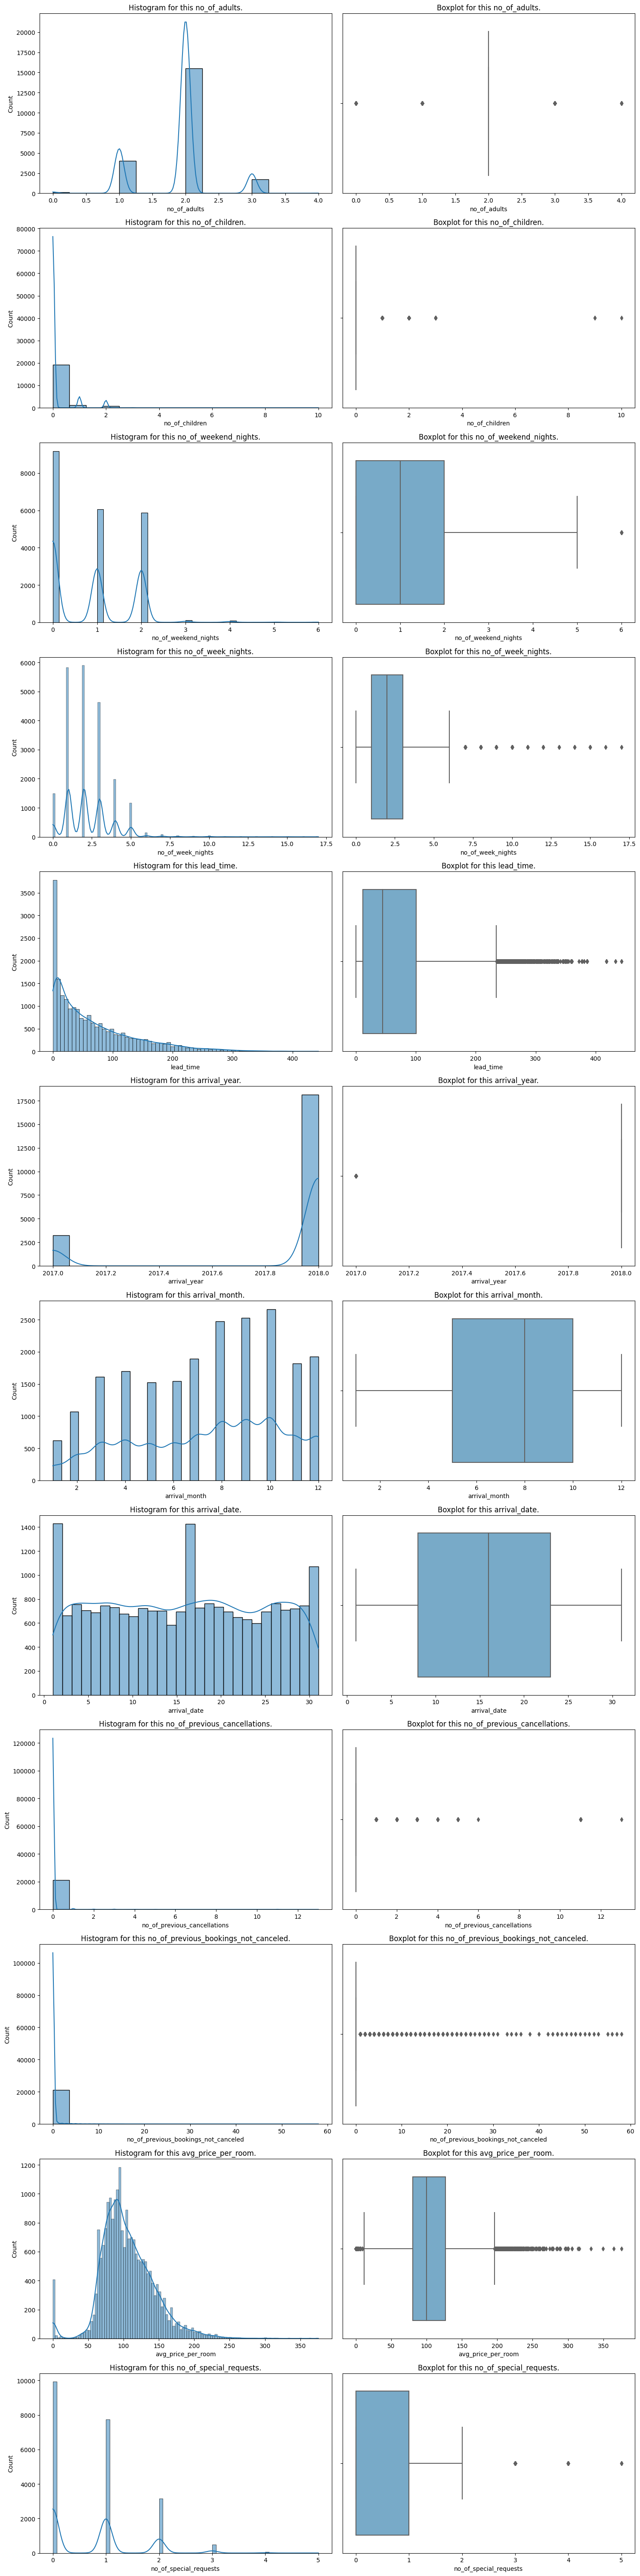

In [27]:
numPlotDistribution(dfCopied, numericalColumns)

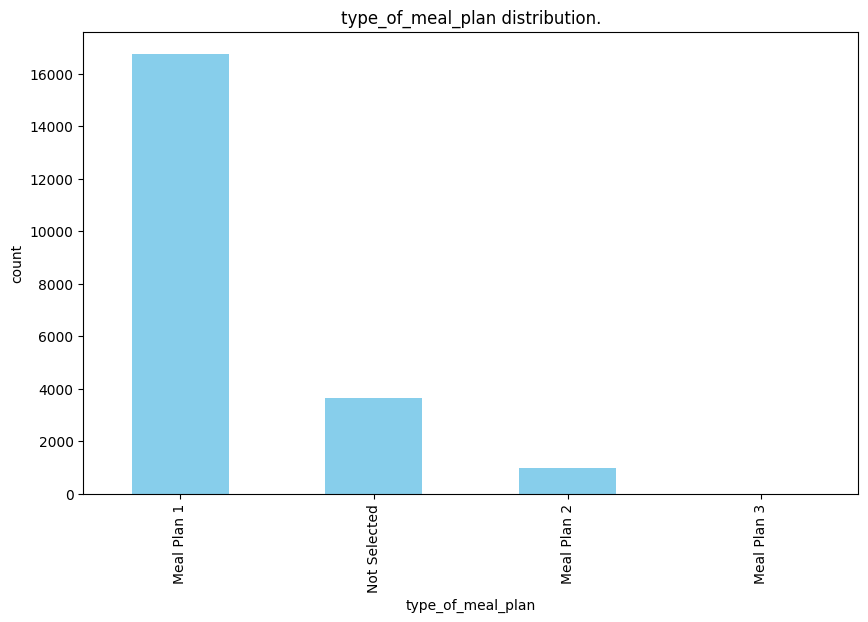

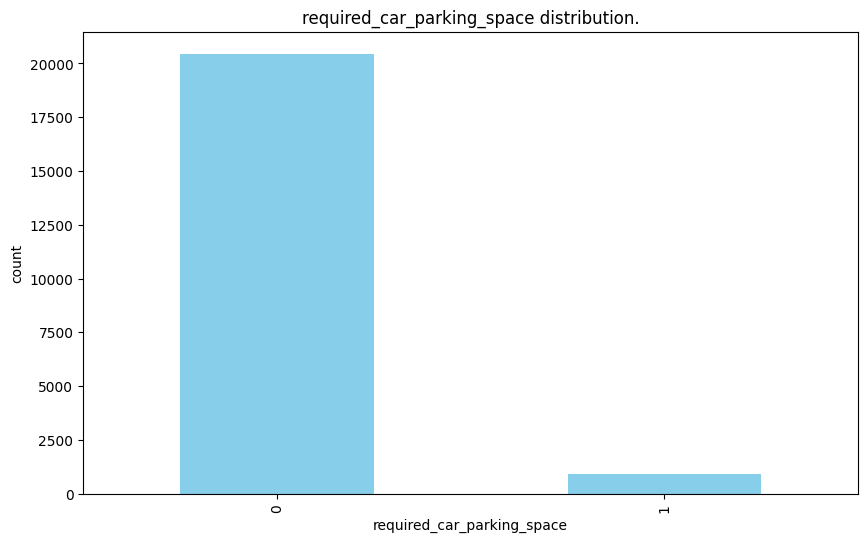

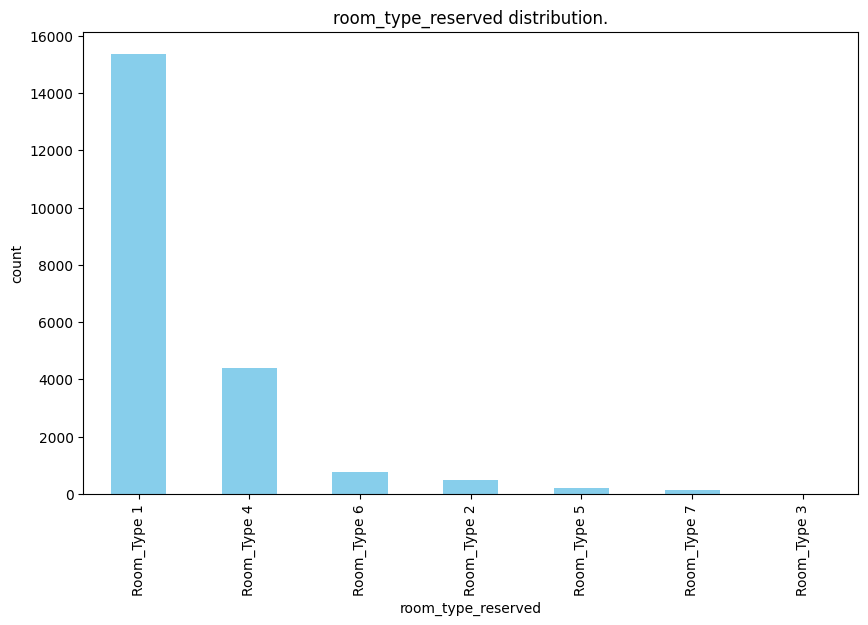

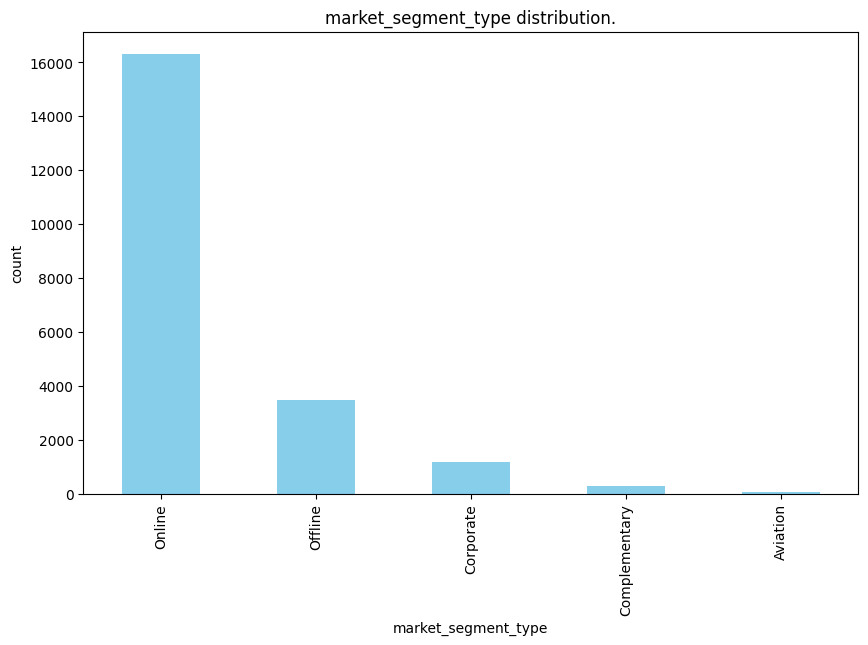

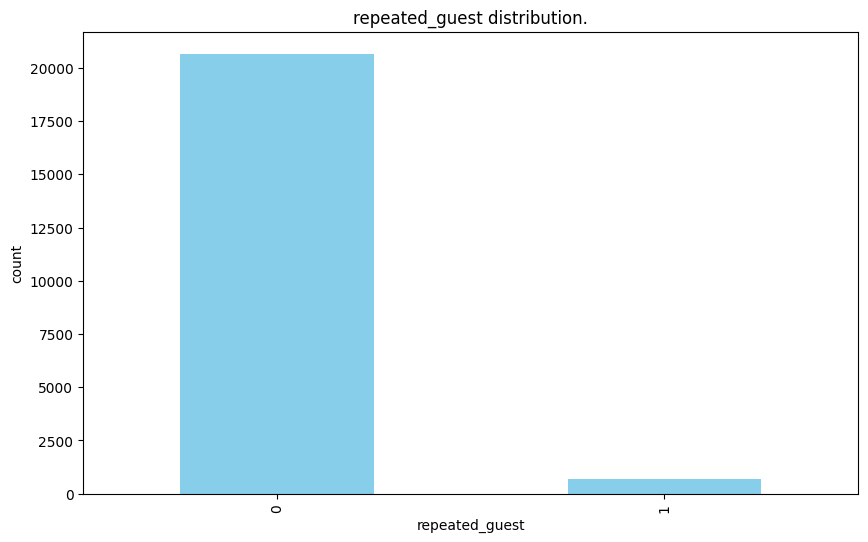

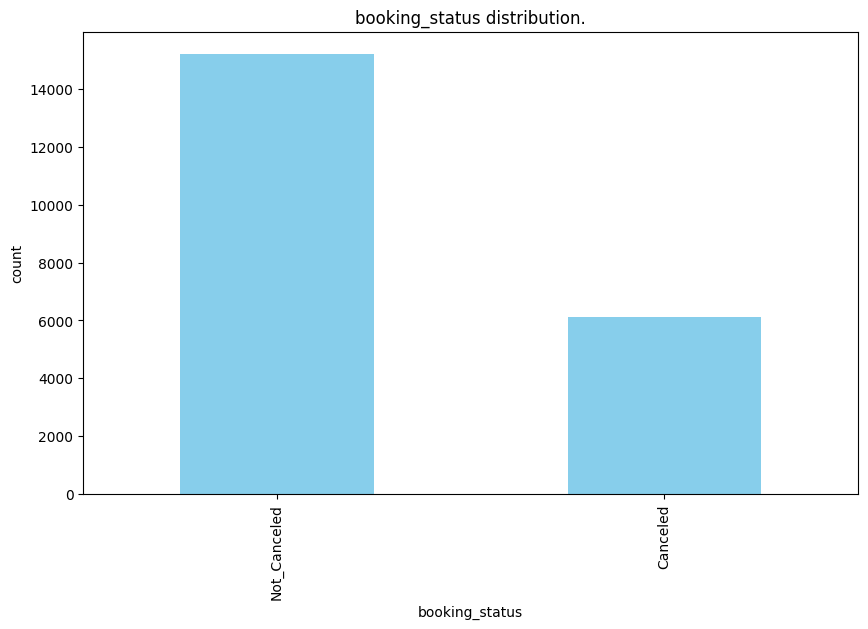

In [28]:
for categoricalFeatures in categoricalColumns:
    plt.figure(figsize = (10, 6))
    dfCopied[categoricalFeatures].value_counts().plot(kind = "bar", color = "skyblue")
    plt.title(f"{categoricalFeatures} distribution.")
    plt.xlabel(categoricalFeatures)
    plt.ylabel("count")
    plt.show()

### BIVARIATE ANALYSIS

In [29]:
def plotBivariateNumricalFeatures(df, target, numFeatures):
    numOfPlots = len(numFeatures)
    numRows = (numOfPlots + 1)//2

    fig, axes = plt.subplots(numRows, 2, figsize = (15, numRows*5))
    axes = axes.flatten()

    for i, column in enumerate(numFeatures):
        sns.boxplot(x = target, y = column, ax = axes[i], data = df, palette = "Blues")
        axes[i].set_title(f"{column} vs {target}.")
    
    plt.tight_layout()
    plt.show()

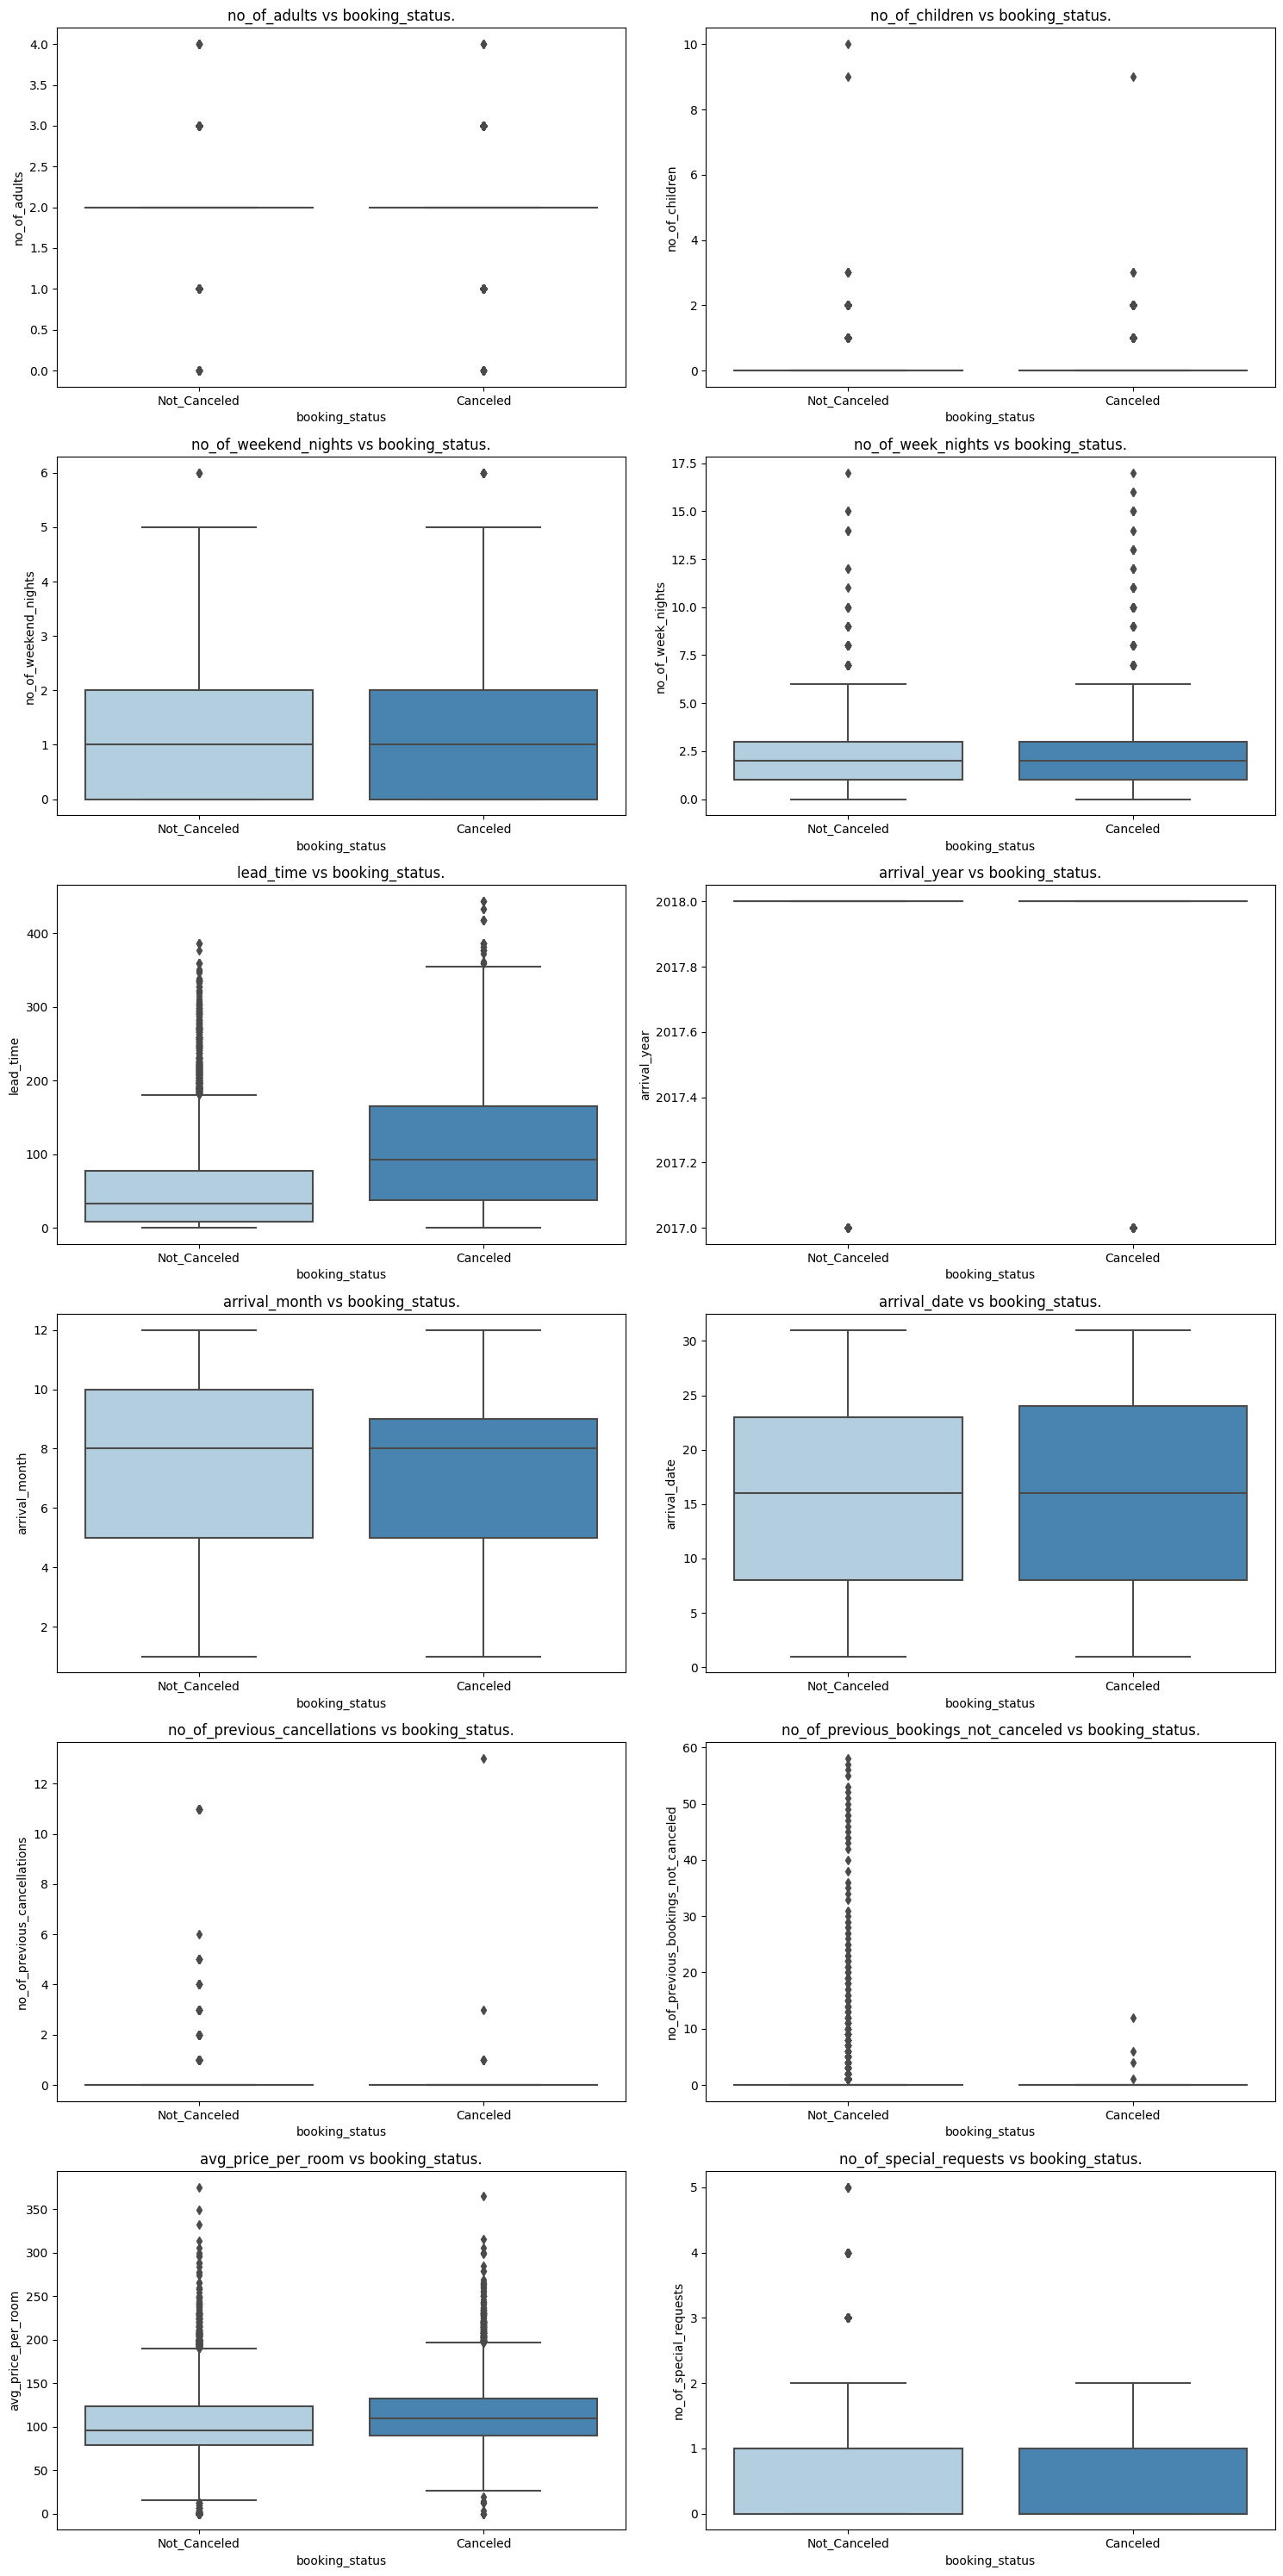

In [30]:
plotBivariateNumricalFeatures(dfCopied, 'booking_status', numericalColumns)

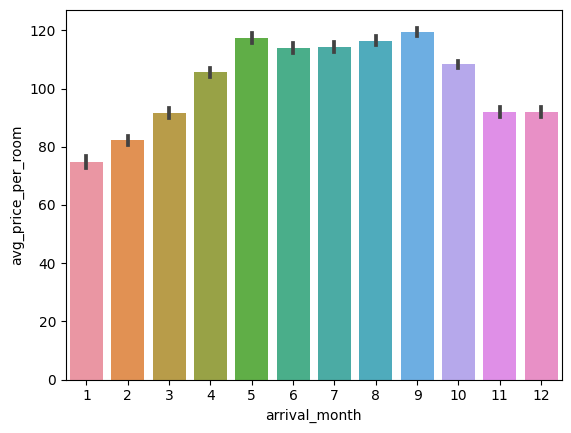

In [31]:
sns.barplot(x = 'arrival_month', y = 'avg_price_per_room', data = dfCopied)
plt.show()

In [32]:
def plotBivariateCategoricalFeatures(df, target, categoricalFeatures):
    numFeatures = len(categoricalFeatures)
    numRows = (numFeatures+1)//2

    fig, axes = plt.subplots(numRows, 2, figsize = (15, numRows*5))
    axes = axes.flatten()

    for i, feature in enumerate(categoricalFeatures):
        sns.countplot(x = feature, hue = target, data = df, palette = "Set2", ax = axes[i])
        axes[i].set_title(f"{feature} vs {target}")
        axes[i].tick_params(axis = 'x', rotation = 90)

    plt.tight_layout()
    plt.show()

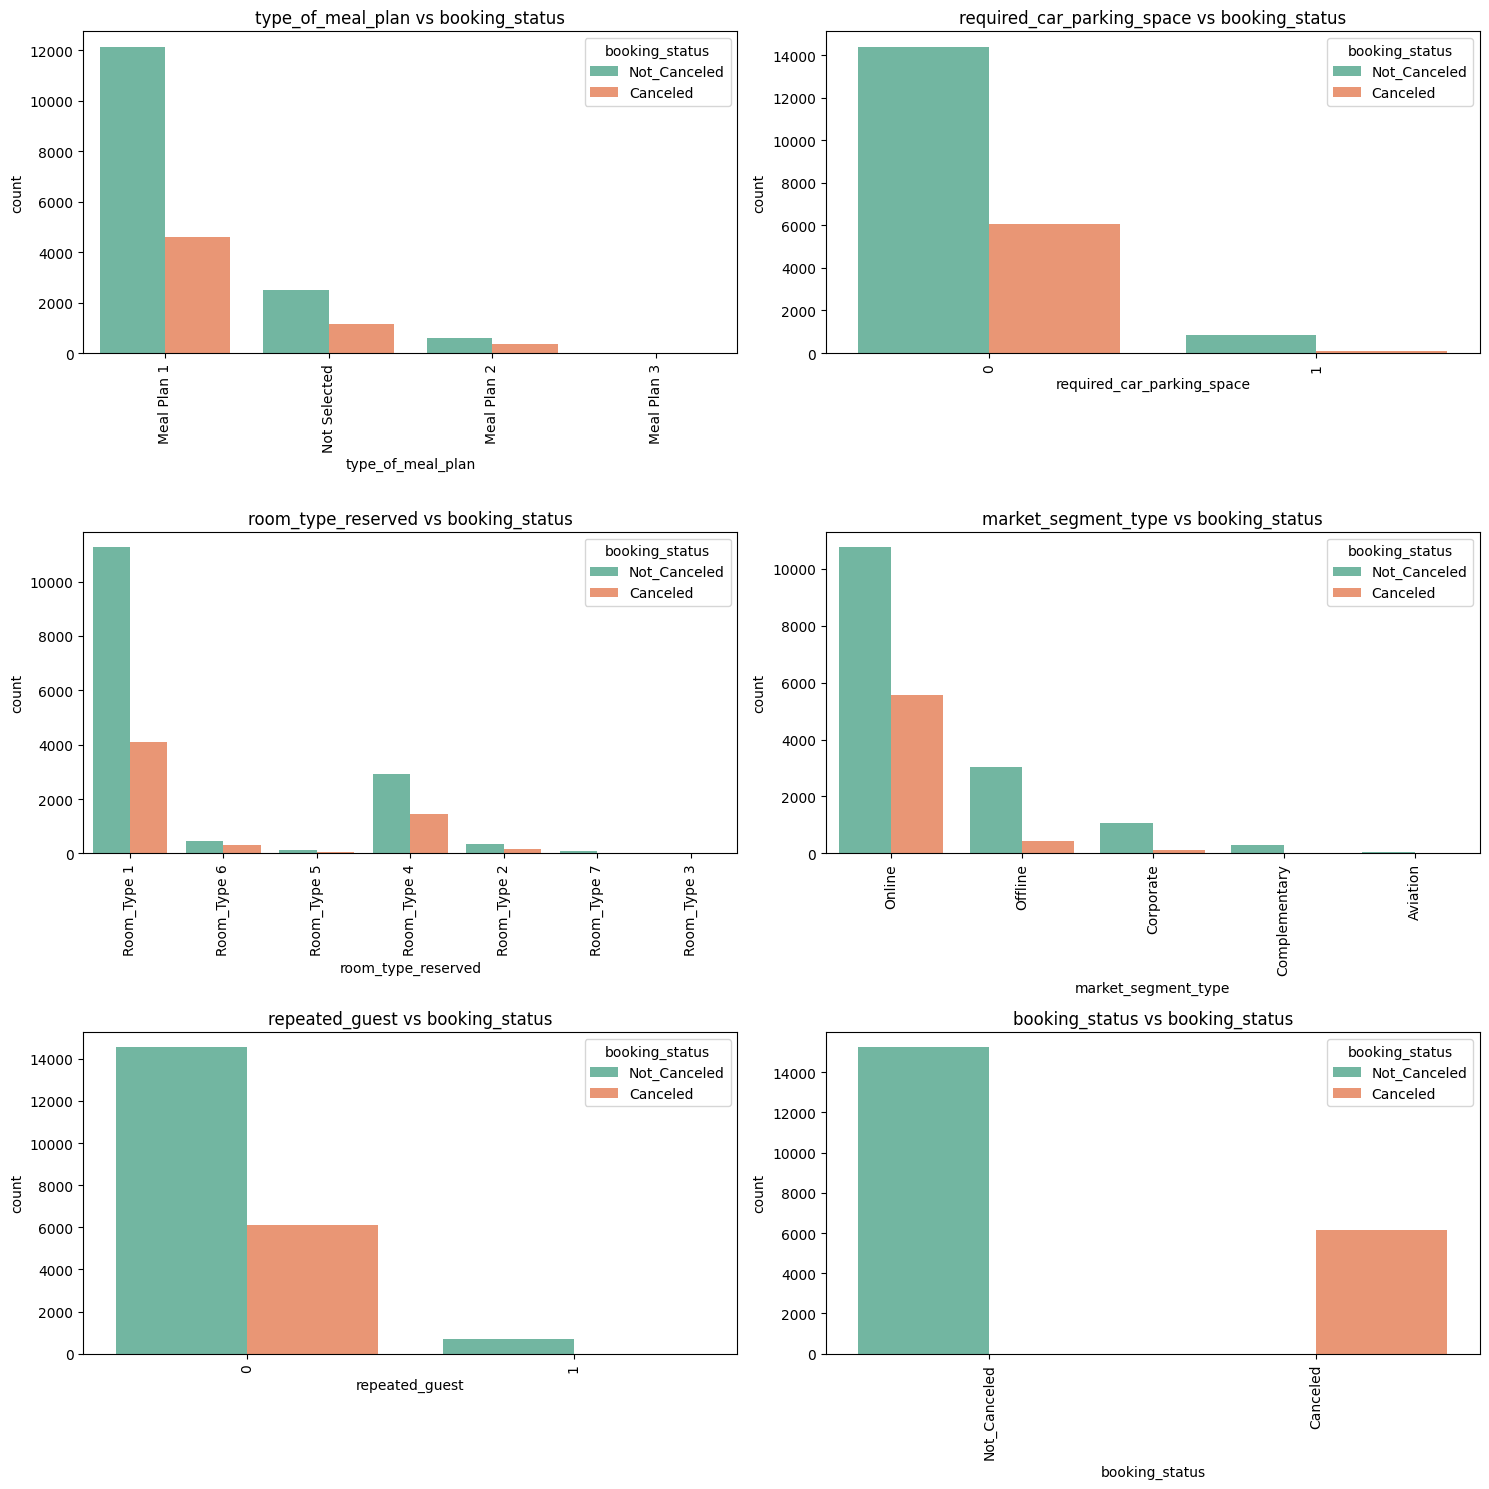

In [33]:
plotBivariateCategoricalFeatures(dfCopied, 'booking_status', categoricalColumns)

### Data Processing

In [34]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_

In [36]:
dfCopied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_

In [37]:
## Label Encoding
from sklearn.preprocessing import LabelEncoder

In [38]:
labelEncoder = LabelEncoder()
mappingsForLabels = {}

for columns in categoricalColumns:
    df[columns] = labelEncoder.fit_transform(df[columns])
    mappingsForLabels[columns] = {label : code for label, code in zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_))}
    

In [39]:
mappingsForLabels

{'type_of_meal_plan': {'Meal Plan 1': 0,
  'Meal Plan 2': 1,
  'Meal Plan 3': 2,
  'Not Selected': 3},
 'required_car_parking_space': {0: 0, 1: 1},
 'room_type_reserved': {'Room_Type 1': 0,
  'Room_Type 2': 1,
  'Room_Type 3': 2,
  'Room_Type 4': 3,
  'Room_Type 5': 4,
  'Room_Type 6': 5,
  'Room_Type 7': 6},
 'market_segment_type': {'Aviation': 0,
  'Complementary': 1,
  'Corporate': 2,
  'Offline': 3,
  'Online': 4},
 'repeated_guest': {0: 0, 1: 1},
 'booking_status': {'Canceled': 0, 'Not_Canceled': 1}}

In [40]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int32  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int32  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_

### Multicollinearity

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

In [44]:
X = add_constant(df)
vifData = pd.DataFrame()

vifData["feature"]  = X.columns

In [45]:
vifData

,feature
0,const
1,no_of_adults
2,no_of_children
3,no_of_weekend_nights
4,no_of_week_nights
5,type_of_meal_plan
6,required_car_parking_space
7,room_type_reserved
8,lead_time
9,arrival_year


In [46]:
vifData["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [47]:
vifData

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


### Our data do not have multicollinearity (good for our ml model)

In [48]:
correlation = df.corr()
correlation

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

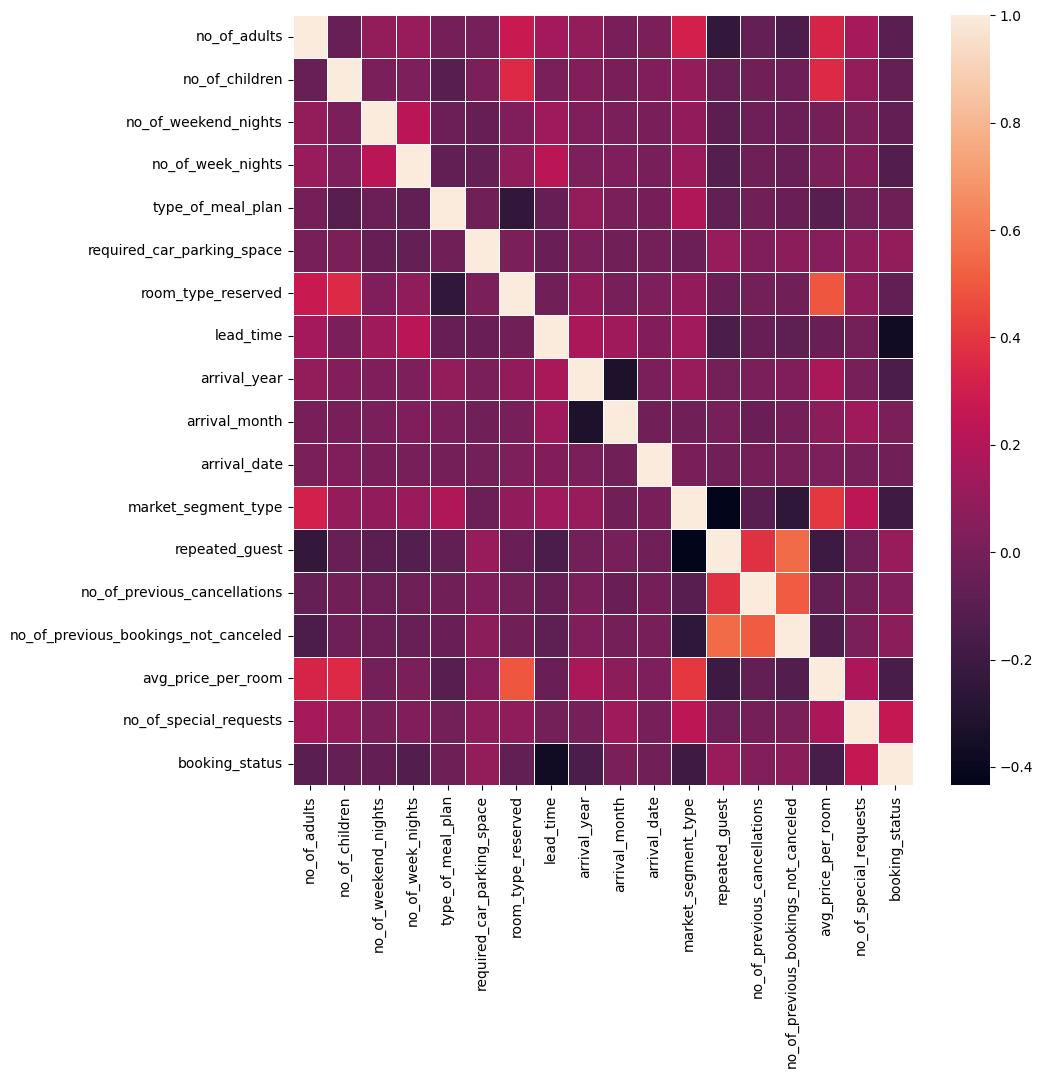

In [49]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation, linewidths = 0.5)

### Skewness

In [50]:
skewness = df.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [51]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [52]:
skewnessTransformed = df.skew()
skewnessTransformed

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

### Handling Imbalaned data

In [53]:
df['booking_status'].value_counts()

1    15231
0     6128
Name: booking_status, dtype: int64

In [54]:
X = df.drop(columns = "booking_status")
y = df["booking_status"]

In [55]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [56]:
y

0        1
1        1
2        0
3        1
4        0
        ..
29012    0
29013    1
29014    1
29015    1
29019    1
Name: booking_status, Length: 21359, dtype: int32

In [57]:
## Before SMOTE technique
y.value_counts()

1    15231
0     6128
Name: booking_status, dtype: int64

In [58]:
from imblearn.over_sampling import SMOTE

In [61]:
smote = SMOTE(random_state = 42)

XResidual, yResidual = smote.fit_resample(X, y)

In [62]:
yResidual.value_counts()

1    15231
0    15231
Name: booking_status, dtype: int64

In [66]:
balancedDf = pd.DataFrame(XResidual, columns = X.columns)
balancedDf['booking_status'] = yResidual

In [67]:
balancedDf.shape

(30462, 18)

In [68]:
balancedDfCopy = balancedDf.copy()
balancedDfCopy

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.000000,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.500000,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.000000,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.250000,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30457,2,0,0,2,1,0,0,265,2018,6,24,3,0.0,0.0,0.0,111.037207,0,0
30458,1,0,1,3,0,0,0,103,2018,4,18,3,0.0,0.0,0.0,72.250000,0,0
30459,2,0,1,2,1,0,0,27,2018,6,12,4,0.0,0.0,0.0,104.556265,0,0
30460,1,0,1,1,3,0,0,46,2018,4,4,4,0.0,0.0,0.0,107.100000,0,0


### Feature Selection

In [69]:
len(balancedDfCopy.columns)

18

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
X = df.drop(columns = "booking_status")
y = df["booking_status"]

In [72]:
model = RandomForestClassifier(random_state = 42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [74]:
featureImportance = model.feature_importances_

In [75]:
featureImportanceDf = pd.DataFrame({
    "feature" : X.columns,
    "importance" : featureImportance
})

In [76]:
featureImportanceDf

,feature,importance
0,no_of_adults,0.020094
1,no_of_children,0.009397
2,no_of_weekend_nights,0.037834
3,no_of_week_nights,0.055839
4,type_of_meal_plan,0.016781
5,required_car_parking_space,0.008540
6,room_type_reserved,0.018505
7,lead_time,0.283888
8,arrival_year,0.021267
9,arrival_month,0.079493


In [79]:
topFeatureImportanceDF = featureImportanceDf.sort_values(by = "importance", ascending = False)

In [81]:
top10Features = topFeatureImportanceDF["feature"].head(10)
top10FeaturesDf = df[top10Features.to_list() + ["booking_status"]]
top10FeaturesDf.head()

,lead_time,avg_price_per_room,no_of_special_requests,arrival_date,arrival_month,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults,booking_status
0,26,161.00,0,17,10,4,1,2,2017,2,1
1,98,121.50,2,16,7,4,1,1,2018,2,1
2,433,70.00,0,8,9,3,3,0,2018,2,0
3,195,72.25,0,8,8,3,5,2,2018,2,1
4,188,130.00,0,15,6,3,2,0,2018,1,0


In [82]:
len(top10FeaturesDf.columns)

11

In [83]:
top10FeaturesDfCopy = top10FeaturesDf.copy()
top10FeaturesDfCopy

,lead_time,avg_price_per_room,no_of_special_requests,arrival_date,arrival_month,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults,booking_status
0,26,161.00,0,17,10,4,1,2,2017,2,1
1,98,121.50,2,16,7,4,1,1,2018,2,1
2,433,70.00,0,8,9,3,3,0,2018,2,0
3,195,72.25,0,8,8,3,5,2,2018,2,1
4,188,130.00,0,15,6,3,2,0,2018,1,0
...,...,...,...,...,...,...,...,...,...,...,...
29012,65,132.30,0,21,6,4,1,0,2018,3,0
29013,86,126.90,1,17,6,4,3,2,2018,2,1
29014,0,139.50,1,12,10,4,2,0,2018,2,1
29015,43,55.00,2,26,12,3,2,2,2017,2,1


### Model Selection

In [84]:
!pip install xgboost lightgbm

   ---------------------------------------- 56.8/56.8 MB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 1.5/1.5 MB 5.1 MB/s eta 0:00:00



In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [107]:
X = top10FeaturesDf.drop(columns = "booking_status")
y = top10FeaturesDf["booking_status"]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [109]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state = 42),
    "Logistic Regression" : LogisticRegression(random_state = 42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state = 42),
    "Support Vector Machine" : SVC(random_state = 42),
    "Decision Tree" : DecisionTreeClassifier(random_state = 42),
    "Naive Bayes" : GaussianNB(),
    "KNN" : KNeighborsClassifier(),
    "XGBoost" : XGBClassifier(random_state = 42),
    "AdaBoost" : AdaBoostClassifier(random_state = 42),
    "LGBM" : LGBMClassifier(random_state = 42)
}

In [110]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 score" : []
}

In [111]:
for modelName, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    yPrediction = classifier.predict(X_test)
    accuracyScore = accuracy_score(y_test, yPrediction)
    precision = precision_score(y_test, yPrediction)
    recall = recall_score(y_test, yPrediction)
    f1 = f1_score(y_test, yPrediction)

    metrics["Model"].append(modelName)
    metrics["Accuracy"].append(accuracyScore)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 score"].append(f1)

In [112]:
metrics

{'Model': ['Random Forest',
  'Logistic Regression',
  'Gradient Boosting',
  'Support Vector Machine',
  'Decision Tree',
  'Naive Bayes',
  'KNN',
  'XGBoost',
  'AdaBoost',
  'LGBM'],
 'Accuracy': [0.850187265917603,
  0.7909644194756554,
  0.8415262172284644,
  0.7310393258426966,
  0.7956460674157303,
  0.7705992509363296,
  0.7411048689138576,
  0.849250936329588,
  0.8174157303370787,
  0.8560393258426966],
 'Precision': [0.8713431896822901,
  0.8112817483756645,
  0.8615432482887367,
  0.7304629168740667,
  0.8563295378432686,
  0.8512339242266249,
  0.7782672540381792,
  0.8744836352081348,
  0.8464898595943837,
  0.8782498414711477],
 'Recall': [0.923025658113962,
  0.915361546151283,
  0.922692435854715,
  0.9780073308897035,
  0.8520493168943686,
  0.8160613128957014,
  0.8830389870043319,
  0.9170276574475175,
  0.9040319893368877,
  0.923025658113962],
 'F1 score': [0.8964401294498383,
  0.8601847502739941,
  0.8910699919549476,
  0.8363014674455052,
  0.8541840654751963,

In [113]:
metricsDf = pd.DataFrame(metrics)
metricsDf

,Model,Accuracy,Precision,Recall,F1 score
0,Random Forest,0.850187,0.871343,0.923026,0.896440
1,Logistic Regression,0.790964,0.811282,0.915362,0.860185
2,Gradient Boosting,0.841526,0.861543,0.922692,0.891070
3,Support Vector Machine,0.731039,0.730463,0.978007,0.836301
4,Decision Tree,0.795646,0.856330,0.852049,0.854184
5,Naive Bayes,0.770599,0.851234,0.816061,0.833277
6,KNN,0.741105,0.778267,0.883039,0.827349
7,XGBoost,0.849251,0.874484,0.917028,0.895250
8,AdaBoost,0.817416,0.846490,0.904032,0.874315
9,LGBM,0.856039,0.878250,0.923026,0.900081


### Train our model

In [105]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [114]:
X = top10FeaturesDf.drop(columns = "booking_status")
y = top10FeaturesDf["booking_status"]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [116]:
randomForest = RandomForestClassifier(random_state = 42)

In [120]:
paramsDictionary = {
    'n_estimators' : randint(100, 500),
    'max_depth' : randint(10, 50),
    'min_samples_split' : randint(2, 10),
    'min_samples_leaf' : randint(1, 5),
    "bootstrap" : [True, False]
}

In [121]:
randomSearchCV = RandomizedSearchCV(
    estimator = randomForest,  # give model,
    param_distributions = paramsDictionary,
    n_iter = 5,
    cv = 5,
    verbose = 2,
    random_state = 42,
    scoring = "accuracy"
)

In [122]:
randomSearchCV.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.5s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.5s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.3s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.3s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002007E7733A0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002007E7732B0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002007E773D00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002007E7739D0>},
                   random_state=42, scoring='accuracy', verbose=2)

In [123]:
randomSearchCV.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [124]:
bestRandomForestModel = randomSearchCV.best_estimator_

In [126]:
yPrediction = bestRandomForestModel.predict(X_test)

In [127]:
accuracyScore = accuracy_score(y_test, yPrediction)
precision = precision_score(y_test, yPrediction)
recall = recall_score(y_test, yPrediction)
f1 = f1_score(y_test, yPrediction)

In [129]:
metricsDf

,Model,Accuracy,Precision,Recall,F1 score
0,Random Forest,0.850187,0.871343,0.923026,0.896440
1,Logistic Regression,0.790964,0.811282,0.915362,0.860185
2,Gradient Boosting,0.841526,0.861543,0.922692,0.891070
3,Support Vector Machine,0.731039,0.730463,0.978007,0.836301
4,Decision Tree,0.795646,0.856330,0.852049,0.854184
5,Naive Bayes,0.770599,0.851234,0.816061,0.833277
6,KNN,0.741105,0.778267,0.883039,0.827349
7,XGBoost,0.849251,0.874484,0.917028,0.895250
8,AdaBoost,0.817416,0.846490,0.904032,0.874315
9,LGBM,0.856039,0.878250,0.923026,0.900081


In [128]:
accuracyScore, precision, recall, f1

(0.8525280898876404, 0.8710485133020345, 0.927357547484172, 0.8983214977404778)

### Model saving

In [131]:
import joblib

In [132]:
joblib.dump(bestRandomForestModel, "randomForest.pkl")

['randomForest.pkl']

In [133]:
loadedRFModel = joblib.load("randomForest.pkl")

### Prediction

In [134]:
X_train[0:1]

,lead_time,avg_price_per_room,no_of_special_requests,arrival_date,arrival_month,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults
16440,3,128.0,2,7,8,4,0,1,2018,2


In [135]:
newData = np.array([3, 128.0, 2, 7,	8, 4, 0, 1,	2018, 2]).reshape(1, -1)
predictionNewModel = loadedRFModel.predict(newData)

In [136]:
predictionNewModel

array([1])